In [1]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd
import plotly.express as px
from scipy.stats import linregress

from functions.driver_identification import identify_drivers
# opening STAC catalog

catalog = pystac_client.Client.open(
    #"https://storage.googleapis.com/dgds-data-public/coclico/coclico-stac/catalog.json" # cloud API
    r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)

In [2]:
href = catalog.get_child("shore_mon_hr").assets["data"].href
ds_hr = xr.open_zarr(href)

ds_hr

<xarray.Dataset>
Dimensions:        (stations: 60637, time: 452)
Coordinates:
    changerate     (stations) float32 dask.array<chunksize=(60637,), meta=np.ndarray>
    hotspot_id     (stations) |S31 dask.array<chunksize=(7580,), meta=np.ndarray>
    intercept      (stations) float32 dask.array<chunksize=(60637,), meta=np.ndarray>
    lat            (stations) float64 dask.array<chunksize=(30319,), meta=np.ndarray>
    lon            (stations) float64 dask.array<chunksize=(30319,), meta=np.ndarray>
  * time           (time) datetime64[ns] 1984-05-01 1984-06-01 ... 2021-12-01
    transect_geom  (stations) |S61 dask.array<chunksize=(7580,), meta=np.ndarray>
    transect_id    (stations) |S15 dask.array<chunksize=(15160,), meta=np.ndarray>
Dimensions without coordinates: stations
Data variables:
    outliers       (stations, time) float32 dask.array<chunksize=(3790, 57), meta=np.ndarray>
    sp             (stations, time) float64 dask.array<chunksize=(3790, 57), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Kras, E., Van der Heijden, D. & Luijendijk, A.
    CITATION:            Kras, E. (2019). Planetary-scale classification of n...
    COMMENT:             
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The Shoreline Monitor High Resolution is a dataset o...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['civil engineering', 'geomorphology', 'shoreline dy...
    TEMPORAL_EXTENT:     ['1984-01-01T00:00:00Z', '2022-01-01T00:00:00Z']
    TITLE:               The Shoreline Monitor High Resolution
    TITLE_ABBREVIATION:  shore_mon_hr
    UNITS:

In [3]:
id_class = identify_drivers(ds= ds_hr)

{'Ds': 30.0,
 'r2': 0.89,
 't_max_seasonal_sp': 4,
 't_min_seasonal_sp': 9,
 't_accr': 212,
 'perc_mis2013': 4.76}

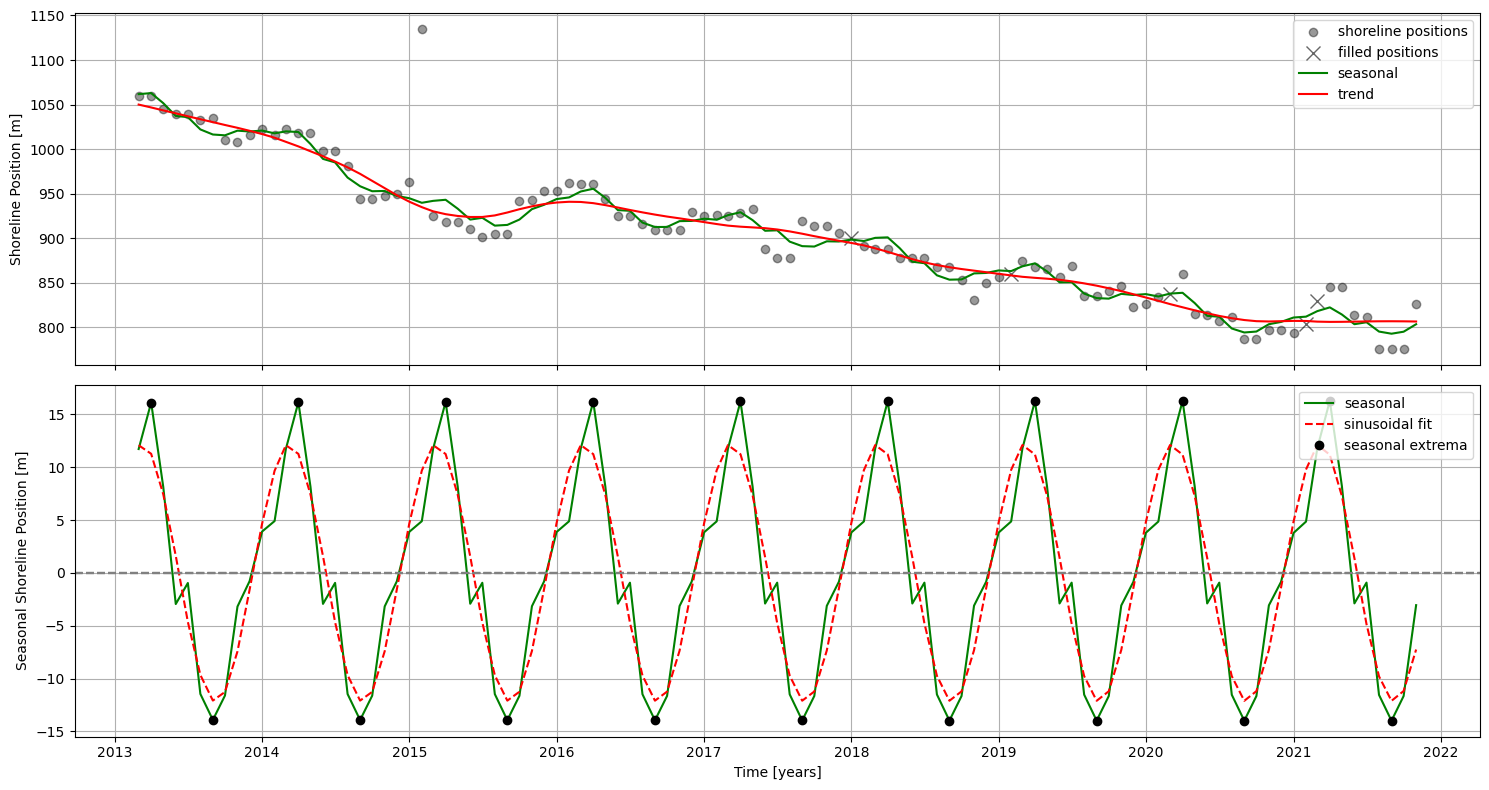

In [4]:
id_class.seasonality(transect= 'BOX_187_084_6')

{'T': 5,
 'Mcr': 0.1380201822974821,
 'Tfixed': 2016,
 'dYjump': 499.62032800586223,
 'dYafter': 0.4141315430239628,
 'absdYafter': 6.1591598875320495,
 'dYdt_jump': 314.4162409002409,
 'dYdt_jumpcorrect': 314.4162409002409}

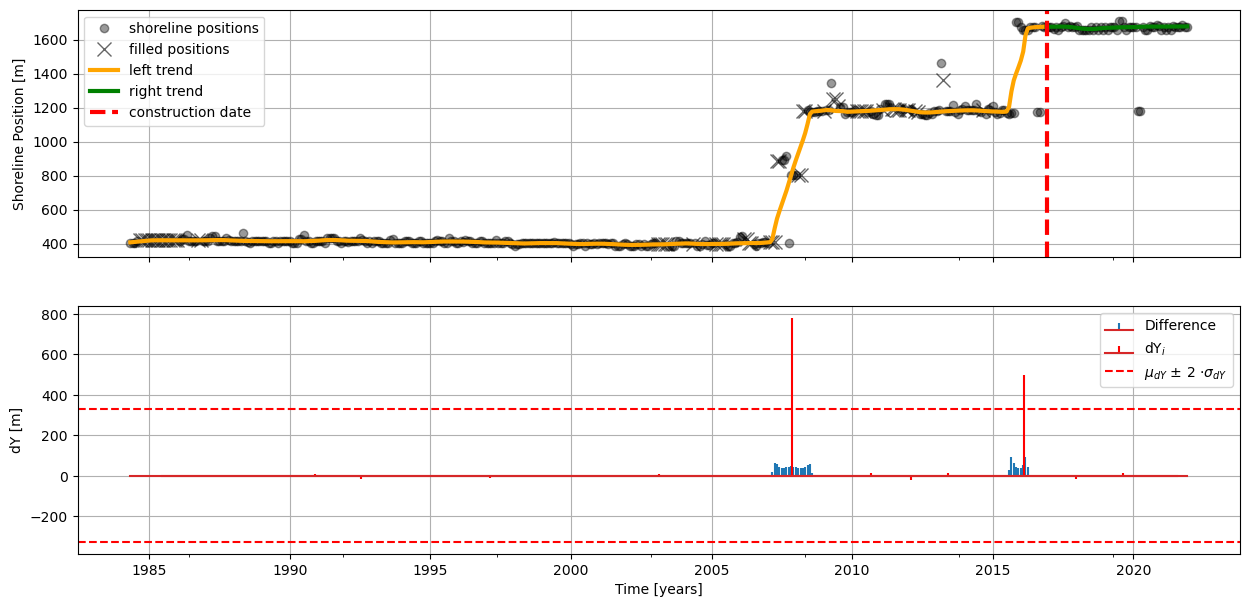

In [5]:
id_class.reclamation(transect= 'BOX_146_061_71')

[{'Date': '2002-07-17',
  'dY': 137.0881407216317,
  'LT': 8.676712328767124,
  'cr': -8.876761878625915,
  'r2': 0.5838058508974786},
 {'Date': '2012-10-31',
  'dY': 98.8785086929373,
  'LT': 8.33972602739726,
  'cr': -5.833245400694589,
  'r2': 0.6861841961746}]

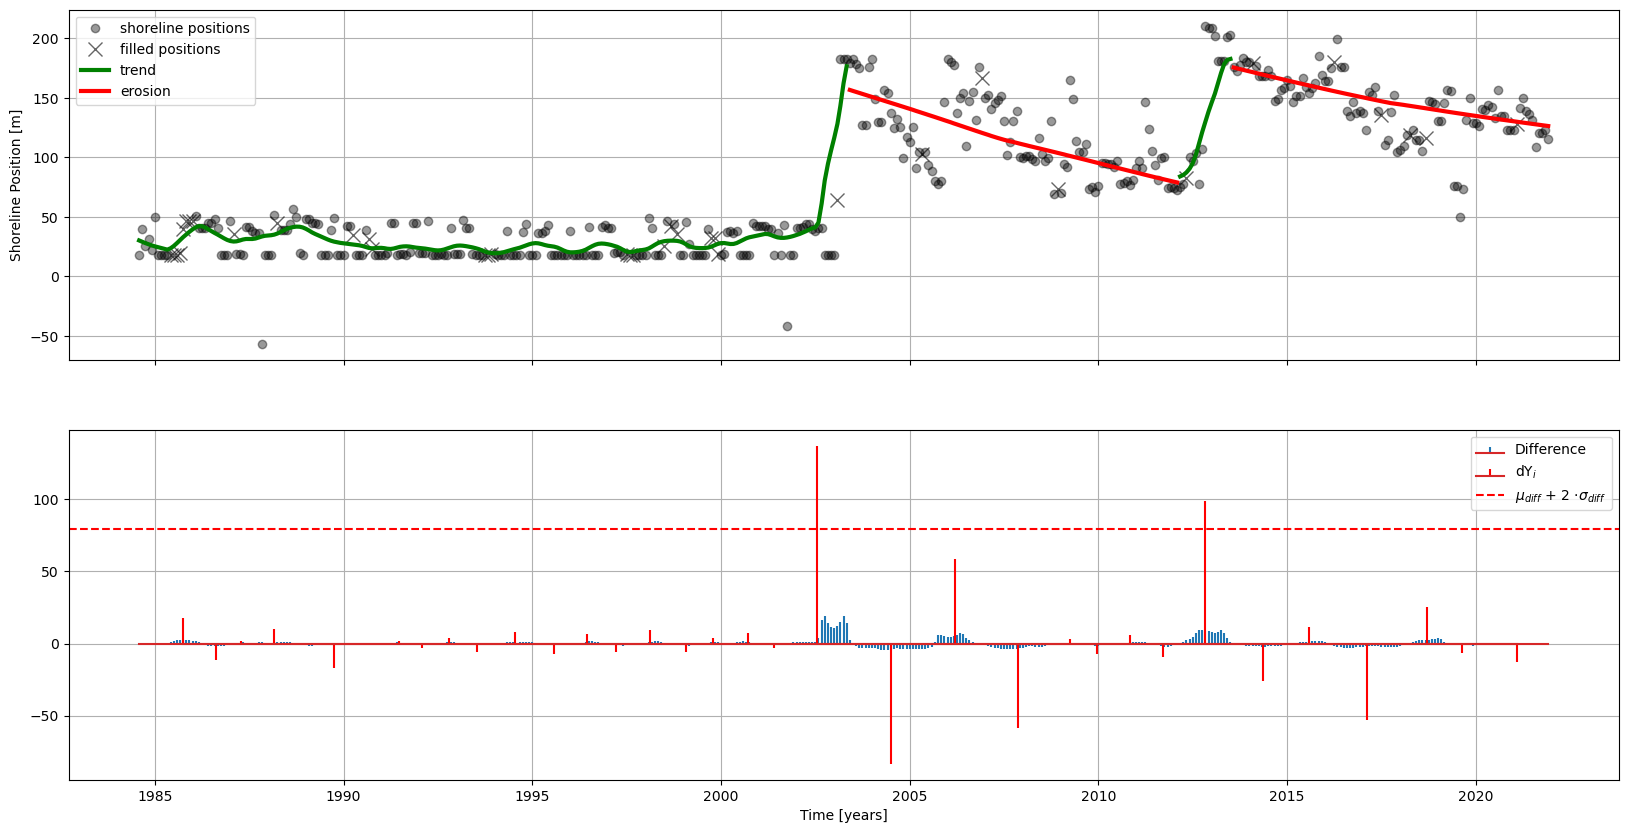

In [6]:
id_class.nourishment(transect= 'BOX_138_495_32')

{'metric': {'Downdrift_1': 3.6},
 'r2': [0.6588476023819909],
 'ldb_type': 'Downdrift',
 'num_transects': [40],
 'num_chars': [[1, 1]]}

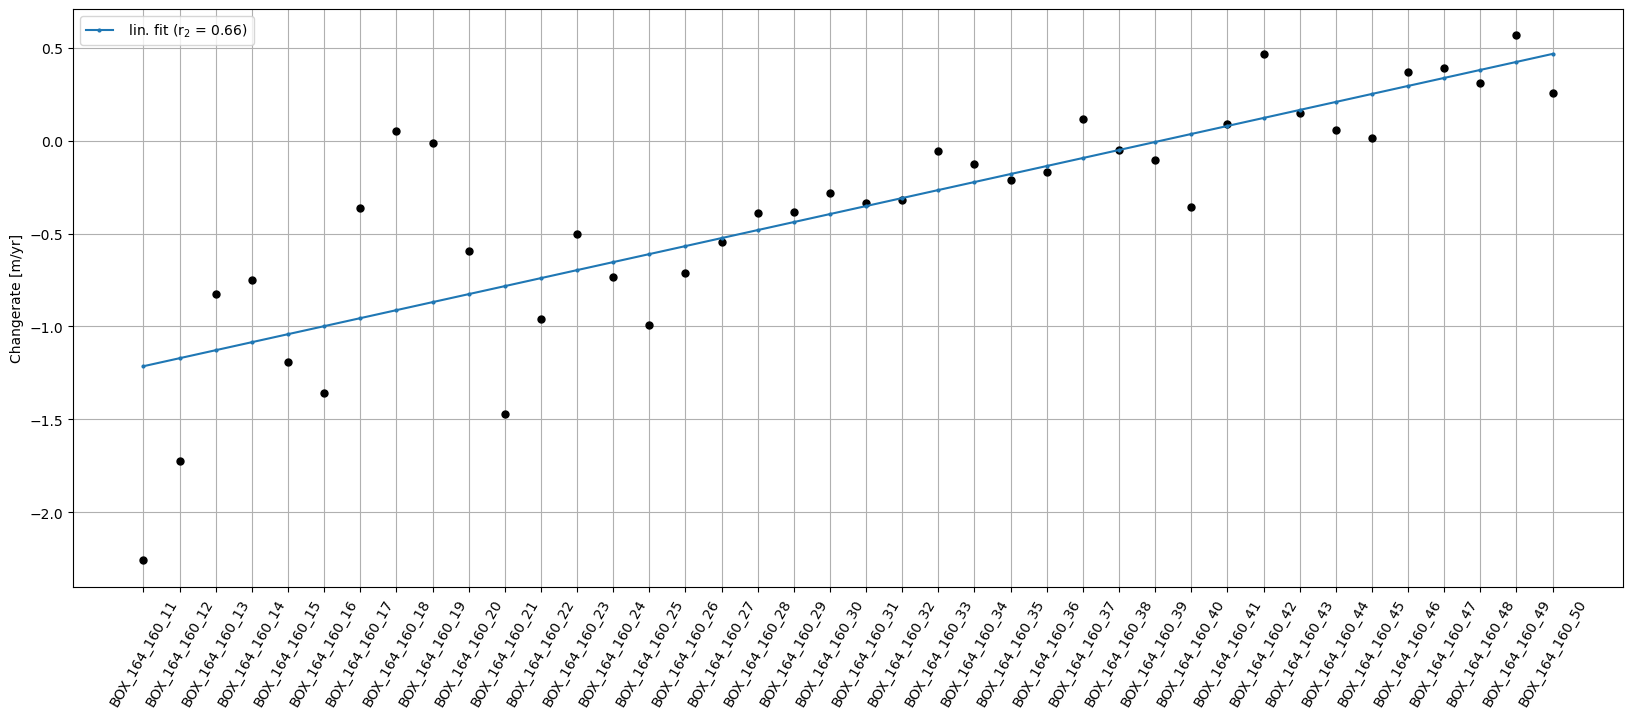

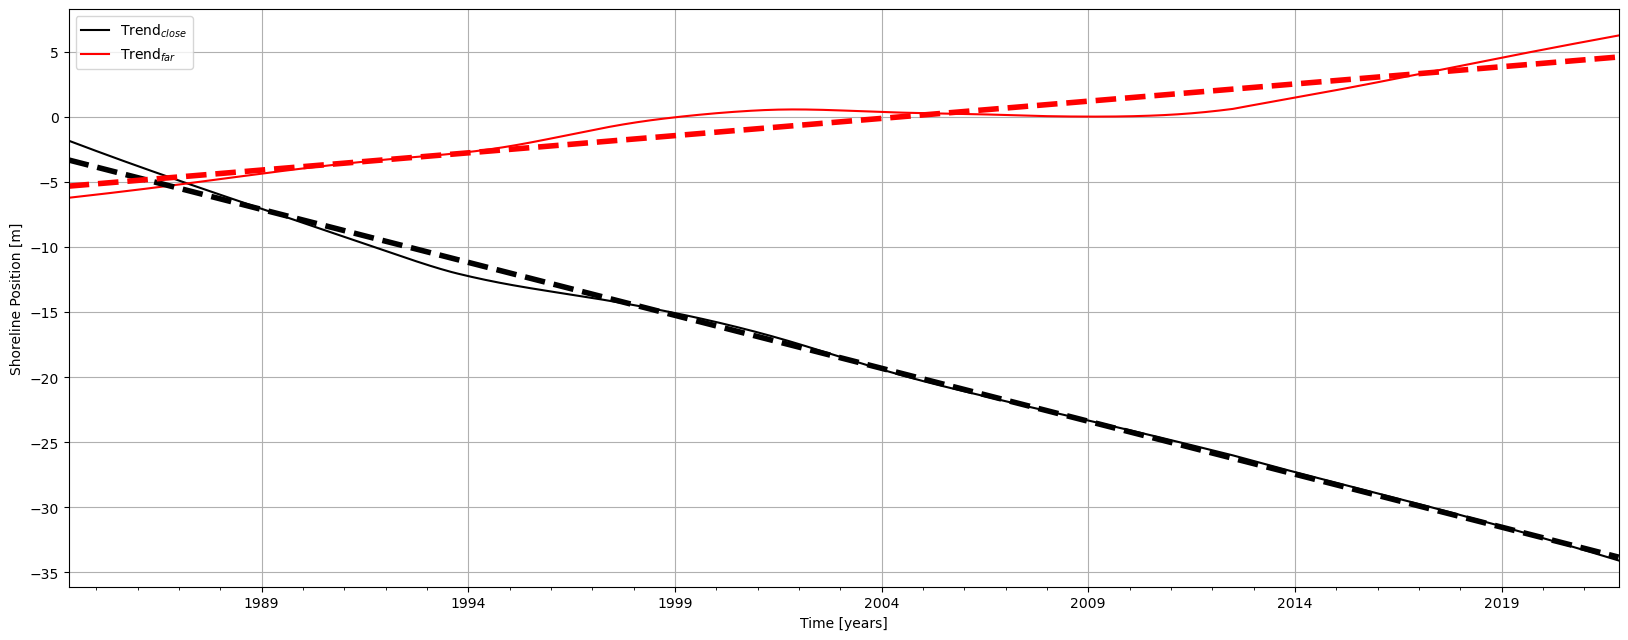

In [7]:
id_class.littoral_driftbarrier(transect= 'BOX_164_160_24', n = 5)

{'metric': {'Updrift_2': 23.8, 'Updrift_1': 3.8},
 'r2': [0.8765786371356009, 0.9707272390852413],
 'ldb_type': 'Double Updrift',
 'num_transects': [17, 15],
 'num_chars': [[2, 1], [1, 1]]}

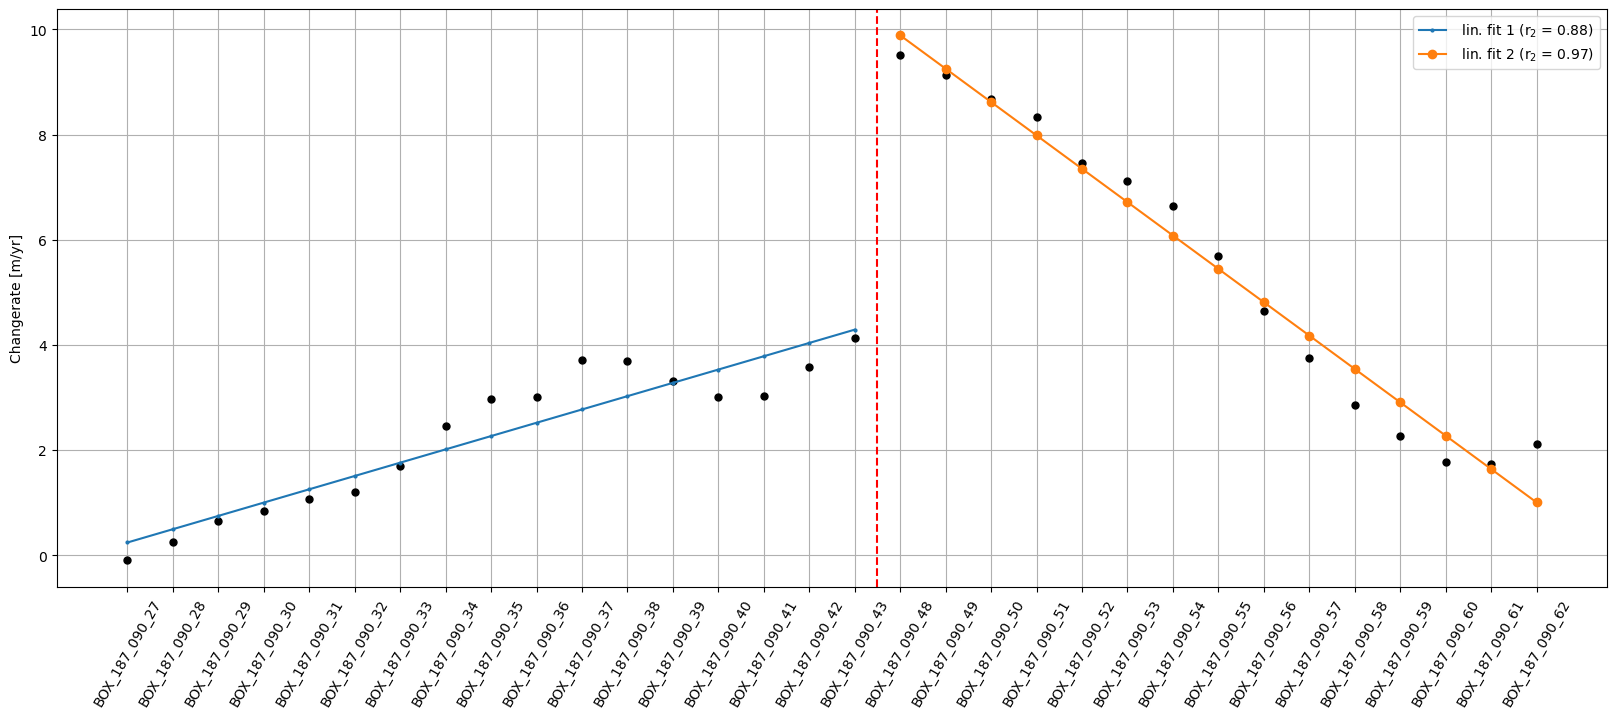

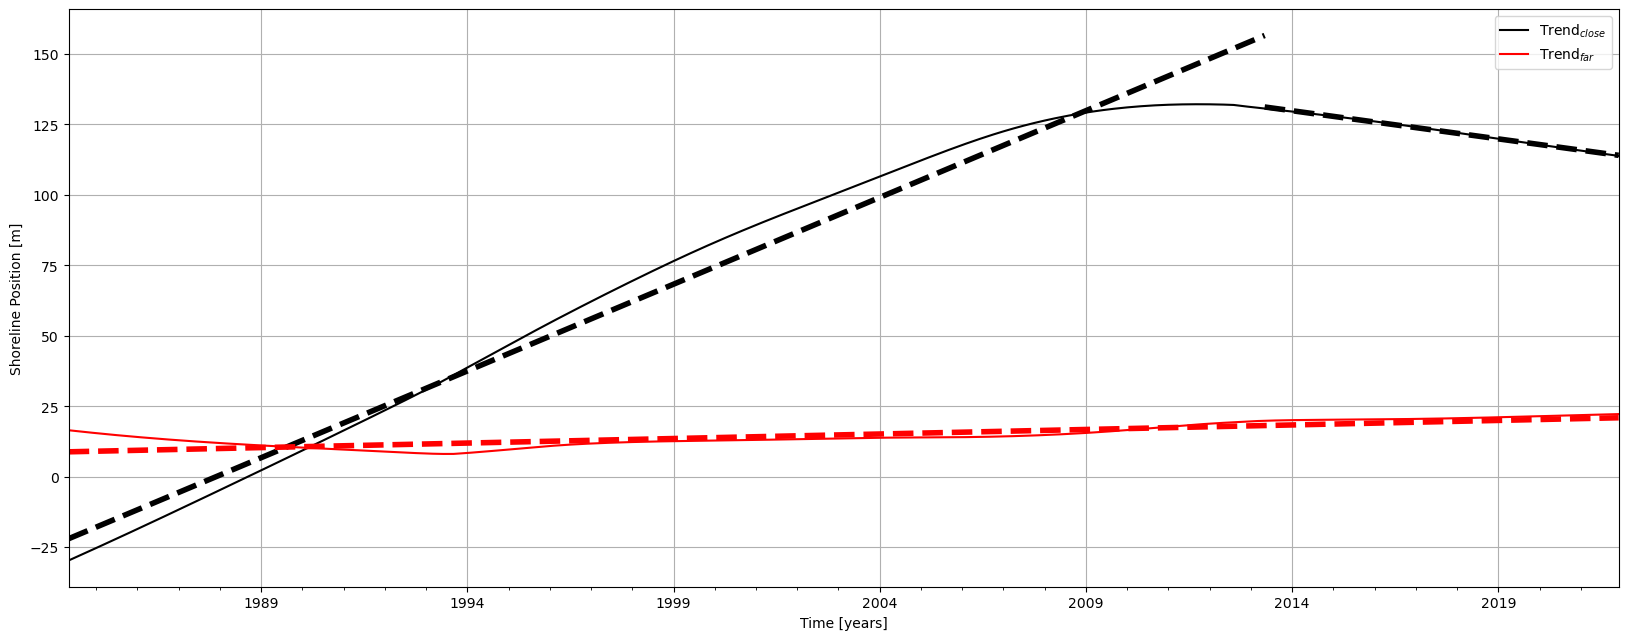

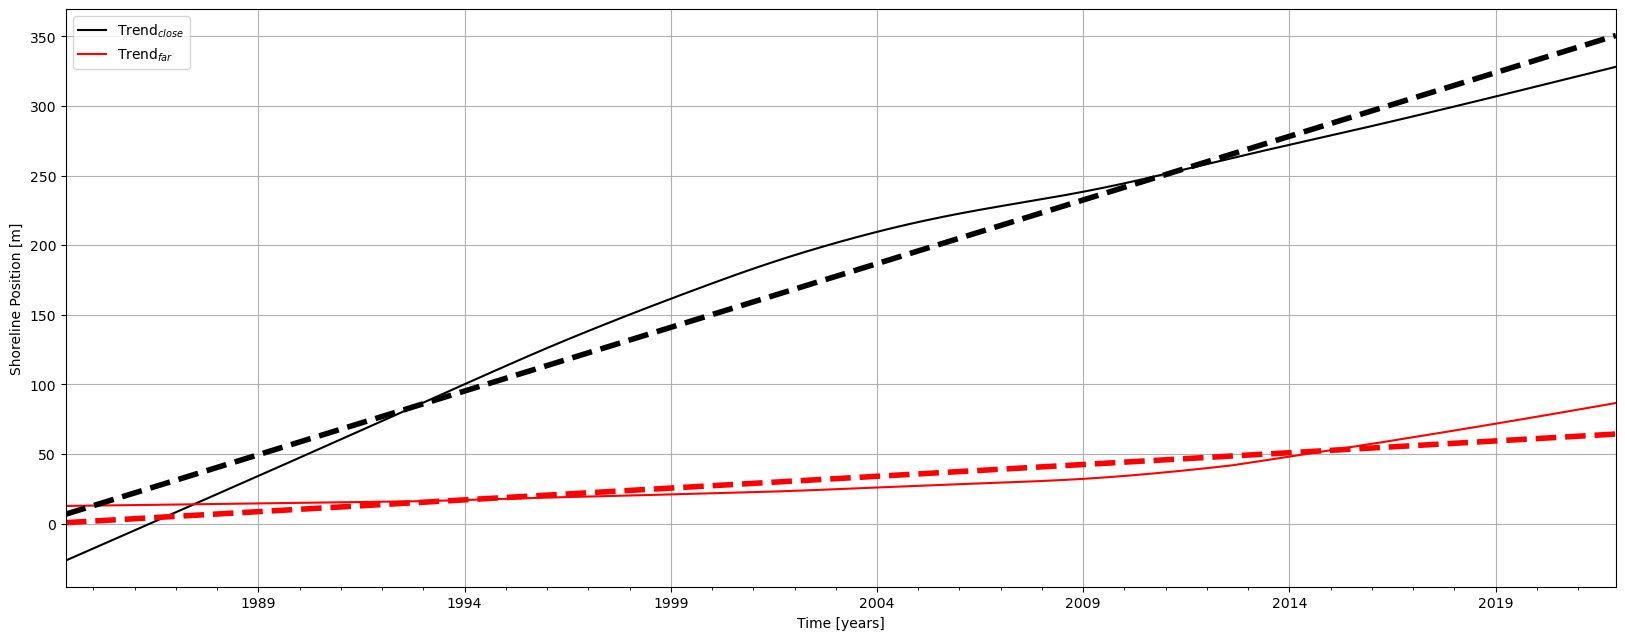

In [11]:
# ijmuiden
id_class.littoral_driftbarrier(transect= 'BOX_187_090_48', n = 10)